In [111]:
import RandomNumberGenerator as rand
import numpy as np
import math
import time
import tqdm
import matplotlib.pyplot as plt
import copy

rand_p = rand.RandomNumberGenerator(940)
rand_w = rand.RandomNumberGenerator(98)
rand_d = rand.RandomNumberGenerator(689)
rand_0 = rand.RandomNumberGenerator(56)
rand_1 = rand.RandomNumberGenerator(3)
rand_2 = rand.RandomNumberGenerator(345)
rand_3 = rand.RandomNumberGenerator(10)
rand_4 = rand.RandomNumberGenerator(935)
rand_5 = rand.RandomNumberGenerator(90)
rand_6 = rand.RandomNumberGenerator(87)
rand_7 = rand.RandomNumberGenerator(6556)
rand_generator = [rand_0, rand_1, rand_2, rand_3, rand_4, rand_5, rand_6, rand_7]

A = 0
number_of_machines = 3
n = 30
p_periods = np.zeros((number_of_machines, n))
d_deadlies = np.zeros(n)
for i in range(number_of_machines):
    for j in range(n):
        p_periods[i,j] = rand_p.nextInt(1,99)
        A = A + p_periods[i,j]
# B = (1/2)*A
# A = (1/6)*A
B = (1/12)*A
A = (1/24)*A
for j in range(n):
    d_deadlies[j] = rand_d.nextInt(A, B)

In [112]:
def goal_function(permutation, periods, deadlines, number_machines, criterion = 1):
    n = len(permutation)
    C = np.zeros((number_machines, n))
    for i in range(number_machines):
        for j in permutation:
            C[i,j] = max(C[i-1,j], C[i,j-1]) + periods[i, j]
    # Czas zakończenia wszystkich zadań (makespan)
    if(criterion == 1):
        try:
            return max(C[2, :])
        except:
            print(periods)
    
    # Maksymalne spóźnienie zadania (max tardiness)
    if(criterion == 2):
        return max(max(C[2,:]-deadlines[:]),0)
    
    # Maksymalna nieterminowość zadania (max lateness)
    if(criterion == 3):
        return max(C[2,:]-deadlines[:])
    
    # Suma nieterminowości zadań (total lateness)
    if(criterion == 4):
        return sum(C[2,:]-deadlines[:])

    

In [113]:
def get_random_permutation(n, random_gen):
    available = [x for x in range(n)]
    result = []
    for i in range(n):
        index = random_gen.nextInt(0, len(available)-1)
        result.append(available.pop(index))
    return result

In [114]:
def roll(n, random_gen):
    random_gen.nextInt(1, n)
    result = []
    result.append(random_gen.nextInt(0, n-1))
    result.append(random_gen.nextInt(0, n-1))
    while result[0] == result[1]:
        result[1] = random_gen.nextInt(0,n-1)
    return result

roll(5, rand_w)

[4, 0]

In [115]:
def task_1(periods, deadlines, number_machines, max_iter, random_gen, proba = 0.05):
    n = len(deadlines)
    P = []
    x = get_random_permutation(n, random_gen[0])
    P.append(copy.deepcopy(x))
#     print(f'Poczatkowe: {P}')
    for it in range(max_iter):
#         if(P[0] == []):
#             print(f'Index: {it}')
        numbers_to_change = roll(n, random_gen[1])
        x_prim = copy.deepcopy(x)
        x_prim[numbers_to_change[0]] = x[numbers_to_change[1]]
        x_prim[numbers_to_change[1]] = x[numbers_to_change[0]]
        
        x_goal_f_1 = goal_function(x, periods, deadlines, number_machines, 1)
        x_goal_f_2 = goal_function(x, periods, deadlines, number_machines, 2)
        x_prim_goal_f_1 = goal_function(x_prim, periods, deadlines, number_machines, 1)
        x_prim_goal_f_2 = goal_function(x_prim, periods, deadlines, number_machines, 2)
        if((x_prim_goal_f_1 < x_goal_f_1 and x_prim_goal_f_2 <= x_goal_f_2) or (x_prim_goal_f_1 <= x_goal_f_1 and x_prim_goal_f_2 < x_goal_f_2)):
            x = copy.deepcopy(x_prim)
            P.append(copy.deepcopy(x_prim))
        else:
            if(proba > random_gen[2].nextFloat(0,1)):
                #x.clear() #Tutaj był błąd, nie wiedzieć czemu przypisanie z linijki niżej nie działało
                x = copy.deepcopy(x_prim)
                P.append(copy.deepcopy(x_prim))
#     print(f'Późniejsze: {P}')
    F = copy.deepcopy(P)
#     print(f'P: {P}')
#     print(f'F: {F}')
    for i in range(len(P)):
        b_1 = goal_function(P[i], periods, deadlines, number_machines, 1)
        b_2 = goal_function(P[i], periods, deadlines, number_machines, 2)
        for a in F:
            a_1 = goal_function(a, periods, deadlines, number_machines, 1)
            a_2 = goal_function(a, periods, deadlines, number_machines, 2)
            if((a_1 < b_1 and a_2 <= b_2) or (a_1 <= b_1 and a_2 < b_2)):
                F.remove(P[i])
                break
    P_f_goal_1 = []
    P_f_goal_2 = []
    F_f_goal_1 = []
    F_f_goal_2 = []
    for i in range(len(P)):
        P_f_goal_1.append(goal_function(P[i], periods, deadlines, number_machines, 1))
        P_f_goal_2.append(goal_function(P[i], periods, deadlines, number_machines, 2))
    for i in range(len(F)):
        F_f_goal_1.append(goal_function(F[i], periods, deadlines, number_machines, 1))
        F_f_goal_2.append(goal_function(F[i], periods, deadlines, number_machines, 2))
    return P, F, P_f_goal_1, P_f_goal_2, F_f_goal_1, F_f_goal_2           

In [116]:
P, F, P_goal_1, P_goal_2, F_goal_1, F_goal_2 = task_1(p_periods, d_deadlies, number_of_machines, 1000, rand_generator, 1)

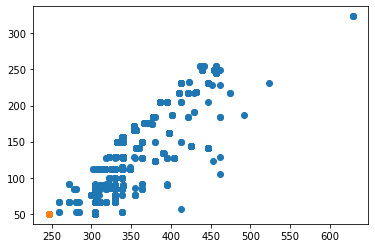

In [120]:
def plot_pareto(F_goal_1, F_goal_2, P_goal_1, P_goal_2):
    plt.scatter(P_goal_1, P_goal_2)
    plt.scatter(F_goal_1, F_goal_2)
    plt.show()

plot_pareto(F_goal_1, F_goal_2, P_goal_1, P_goal_2)

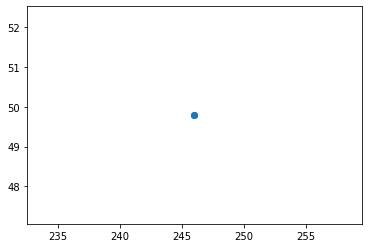

In [118]:
plot_pareto(F_goal_1, F_goal_2)